In [1]:
from scipy.integrate import romberg
help(romberg)

Help on function romberg in module scipy.integrate._quadrature:

romberg(function, a, b, args=(), tol=1.48e-08, rtol=1.48e-08, show=False, divmax=10, vec_func=False)
    Romberg integration of a callable function or method.
    
    Returns the integral of `function` (a function of one variable)
    over the interval (`a`, `b`).
    
    If `show` is 1, the triangular array of the intermediate results
    will be printed. If `vec_func` is True (default is False), then
    `function` is assumed to support vector arguments.
    
    Parameters
    ----------
    function : callable
        Function to be integrated.
    a : float
        Lower limit of integration.
    b : float
        Upper limit of integration.
    
    Returns
    -------
    results  : float
        Result of the integration.
    
    Other Parameters
    ----------------
    args : tuple, optional
        Extra arguments to pass to function. Each element of `args` will
        be passed as a single argument to `fun

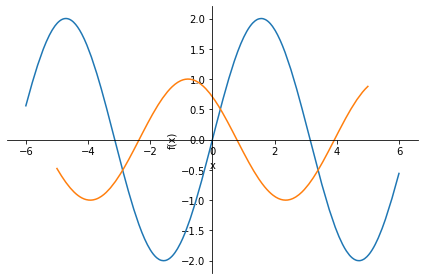

In [4]:
from sympy.plotting import plot
from sympy.abc import x,pi
from sympy.functions import sin,cos

plot((2*sin(x),(x,-6,6)),(cos(x+pi/4),(x,-5,5)))

In [6]:
# 隐函数可视化

from pylab import rc
from sympy import plot_implicit as pt,Eq
from sympy.abc import x,y

rc('font',size=16)
rc('text',usetex=True)
pt(Eq((x-1)**2+(y-2)**3,4),(x,-6,6),(y,-2,4),xlabel='$x$',ylabel='$y$')

RuntimeError: Failed to process string with tex because latex could not be found

RuntimeError: Failed to process string with tex because latex could not be found

<Figure size 432x288 with 1 Axes>

In [9]:
# 求极限

from sympy import *

x = symbols('x')
print(limit(sin(x)/x,x,0))
print(limit(pow(1+1/x,x),x,oo))

1
E


In [11]:
# 求偏导

from sympy import *
x,y = symbols('x y')
z = sin(x)+x**2*exp(y) # 构造符号表达
print("关于x的二阶偏导数为：",diff(z,x,2))
print("关于x的一阶偏导数为：",diff(z,x))

关于x的二阶偏导数为： 2*exp(y) - sin(x)
关于x的二阶偏导数为： 2*x*exp(y) + cos(x)


In [15]:
# 级数求和

from sympy import *
k,n = symbols('k n')
print(summation(k**2,(k,1,n)))
print(factor(summation(k**2,(k,1,n))))
print(summation(1/k**2,(k,1,oo)))

n**3/3 + n**2/2 + n/6
n*(n + 1)*(2*n + 1)/6
pi**2/6


In [12]:
# 泰勒展开

from pylab import rc
from sympy import *
from sympy.plotting import *

rc('font',size=16);rc('text',usetex=True)
x = symbols('x')
y = sin(x)
for k in range(3,8,2):
    print(y.series(x,0,k))

plot(y,series(y,x,0,3).removeO(),series(y,x,0,5).removeO(),series(y,x,0,7).removeO(),(x,0,2),xlabel='$x$',ylabel='$y$')


x + O(x**3)
x - x**3/6 + O(x**5)
x - x**3/6 + x**5/120 + O(x**7)


RuntimeError: Failed to process string with tex because latex could not be found

RuntimeError: Failed to process string with tex because latex could not be found

<Figure size 432x288 with 1 Axes>

In [14]:
# 求解代数方程组

from sympy.abc import x,y
from sympy import solve

s = solve([x**2+y**2-1,x-y],[x,y])
s

[(-sqrt(2)/2, -sqrt(2)/2), (sqrt(2)/2, sqrt(2)/2)]

In [22]:
# 求驻点
from sympy import *
x = symbols('x')
y = 2*x**3-5*x**2+x
x0 = solve(diff(y,x),x)
print("驻点的精确解为",x0)
print("驻点的浮点数表示为",[x0[i].n()for i in range(len(x0))])
y0 = [y.subs(x,0),y.subs(x,1),y.subs(x,x0[0]).n()]
print("三个点的函数值分别为",y0)

驻点的精确解为 [5/6 - sqrt(19)/6, sqrt(19)/6 + 5/6]
驻点的浮点数表示为 [0.106850176076554, 1.55981649059011]
三个点的函数值分别为 [0, -2, 0.0522051838383851]


In [29]:
import numpy as np, numpy.linalg as ng
import matplotlib.pyplot as plt

N = 4; v = 1.0; d =200.0; time=400.0; divs=201
xy = np.array([[-d,d],[d,d],[d,-d],[-d,-d]])
T = np.linspace(0,time,divs); dt =T[1]-T[0]
xyn = np.empty((4,2))
Txy = xy
for n in range(1,len(T)):
    for i in [0,1,2,3]:
        j = (i+1)%4
        dxy = xy[j]=xy[i]
        dd = dxy/ng.norm(dxy)
        xyn[i] = xy[i]+v*dt*dd
    Txy = np.c_[Txy,xyn]
    xy = xyn.copy()

for i in range(N):
    plt.plot(Txy[i,::2],Txy[i,::2])

plt.show()

C:\Users\Monty _L\AppData\Local\Temp\ipykernel_12324\282479584.py:21: UserWarning: Matplotlib is currently using pgf, which is a non-GUI backend, so cannot show the figure.
  plt.show()


RuntimeError: No suitable pdf to png renderer found.

<Figure size 432x288 with 1 Axes>